In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
data = pd.read_csv("NQ_2020-4242024_23.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70689 entries, 0 to 70688
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          70689 non-null  object 
 1   Session       70689 non-null  object 
 2    Time         70689 non-null  object 
 3    Open         70689 non-null  float64
 4    High         70689 non-null  float64
 5    Low          70689 non-null  float64
 6    Last         70689 non-null  float64
 7    Volume       70689 non-null  int64  
 8    # of Trades  70689 non-null  int64  
 9    OHLC Avg     70689 non-null  float64
 10   HLC Avg      70689 non-null  float64
 11   HL Avg       70689 non-null  float64
 12   Bid Volume   70689 non-null  int64  
 13   Ask Volume   70689 non-null  int64  
 14  30S-ORH       70689 non-null  int64  
 15  30S-ORM       70689 non-null  int64  
 16  30S-ORL       70689 non-null  int64  
 17   deltaOpen    70689 non-null  int64  
 18   deltaHigh    70689 non-nu

In [4]:
data.columns = [x.strip() for x in data.columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70689 entries, 0 to 70688
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         70689 non-null  object 
 1   Session      70689 non-null  object 
 2   Time         70689 non-null  object 
 3   Open         70689 non-null  float64
 4   High         70689 non-null  float64
 5   Low          70689 non-null  float64
 6   Last         70689 non-null  float64
 7   Volume       70689 non-null  int64  
 8   # of Trades  70689 non-null  int64  
 9   OHLC Avg     70689 non-null  float64
 10  HLC Avg      70689 non-null  float64
 11  HL Avg       70689 non-null  float64
 12  Bid Volume   70689 non-null  int64  
 13  Ask Volume   70689 non-null  int64  
 14  30S-ORH      70689 non-null  int64  
 15  30S-ORM      70689 non-null  int64  
 16  30S-ORL      70689 non-null  int64  
 17  deltaOpen    70689 non-null  int64  
 18  deltaHigh    70689 non-null  int64  
 19  delt

In [5]:
data['Date'] = data['Date'].str.strip()
data['Session'] = data['Session'].str.strip()
data['Time'] = data['Time'].str.strip()

In [6]:
data.head()

,Date,Session,Time,Open,High,Low,Last,Volume,# of Trades,OHLC Avg,...,deltaHigh,deltaLow,deltaClose,100% Ext,50% Ext,IBH,IB,IBL,-50% Ext,-100% Ext
0,1/2/2023,GBX,17:00:00.000000,11122.50,11150.00,11090.00,11091.75,2415,1938,11113.56,...,-1,-76,-61,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1/2/2023,GBX,17:05:00.000000,11092.75,11106.50,11077.75,11085.00,1171,1089,11090.50,...,102,-33,-33,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/2/2023,GBX,17:10:00.000000,11085.25,11088.50,11053.00,11056.75,1458,1320,11070.88,...,0,-198,-134,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/2/2023,GBX,17:15:00.000000,11056.50,11059.00,11043.75,11051.00,984,907,11052.56,...,28,-61,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/2/2023,GBX,17:20:00.000000,11050.50,11057.25,11044.00,11049.25,586,546,11050.25,...,44,-3,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data['Time'] = data['Time'].str[0:5]

In [8]:
data.head(20)

,Date,Session,Time,Open,High,Low,Last,Volume,# of Trades,OHLC Avg,...,deltaHigh,deltaLow,deltaClose,100% Ext,50% Ext,IBH,IB,IBL,-50% Ext,-100% Ext
0,1/2/2023,GBX,17:00,11122.50,11150.00,11090.00,11091.75,2415,1938,11113.56,...,-1,-76,-61,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1/2/2023,GBX,17:05,11092.75,11106.50,11077.75,11085.00,1171,1089,11090.50,...,102,-33,-33,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/2/2023,GBX,17:10,11085.25,11088.50,11053.00,11056.75,1458,1320,11070.88,...,0,-198,-134,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/2/2023,GBX,17:15,11056.50,11059.00,11043.75,11051.00,984,907,11052.56,...,28,-61,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/2/2023,GBX,17:20,11050.50,11057.25,11044.00,11049.25,586,546,11050.25,...,44,-3,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1/2/2023,GBX,17:25,11050.25,11057.00,11046.50,11046.75,496,424,11050.13,...,33,4,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1/2/2023,GBX,17:30,11047.75,11050.00,11037.50,11042.50,631,579,11044.44,...,36,-52,-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1/2/2023,GBX,17:35,11043.50,11046.00,11038.50,11045.00,361,348,11043.25,...,35,-17,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1/2/2023,GBX,17:40,11045.50,11050.75,11044.50,11046.50,458,441,11046.81,...,34,-4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1/2/2023,GBX,17:45,11046.25,11049.75,11040.00,11043.00,405,392,11044.75,...,42,5,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 1

### Wtv A period high is, we run it by atleast 20 points...
### Confirm this, and then investigate further 

In [9]:
# Find A period high
a_high = None
a_low = None

#key is date, value is high and low tuple ()
a_dict = {}

#Loop through dataframe
for idx, date in enumerate(data['Date']):
    
    #If the time is 8:30 (open) until 9:00 (end of A period) and making sure it is RTH
    if (data['Time'].iloc[idx] >= '08:30') and (data['Time'].iloc[idx] <= '09:00') and (data['Session'].iloc[idx] == 'RTH'):
        #print(data['Time'].iloc[idx])
        
        #Time is 8:30, set the high and low of the first 5 min candle
        if(data['Time'].iloc[idx] == '08:30'):
            a_high = data['High'].iloc[idx]
            a_low = data['Low'].iloc[idx]
        #If time is not 8:30 but within the A period, then check to see if 5 minute candle high is above a_high or if low is below a_low
        else:
            if (data['High'].iloc[idx] > a_high):
                a_high = data['High'].iloc[idx]
            if (data['Low'].iloc[idx] < a_low):
                a_low = data['Low'].iloc[idx]
    
    #Continuing our loop, if the time is 15:05 we set the a_low and a_high in glue in dict
    elif (data['Time'].iloc[idx] == '15:05') and (data['Session'].iloc[idx] == 'GBX'):
        a_dict[data['Date'].iloc[idx]] = (a_low, a_high)

In [10]:
a_dict

{'1/3/2023': (10982.25, 11182.0),
 '1/4/2023': (10905.5, 11046.5),
 '1/5/2023': (10814.75, 10924.75),
 '1/6/2023': (10766.25, 10945.0),
 '1/9/2023': (11194.75, 11325.0),
 '1/10/2023': (11138.0, 11246.0),
 '1/11/2023': (11291.0, 11363.25),
 '1/12/2023': (11311.25, 11518.75),
 '1/13/2023': (11408.75, 11499.25),
 '1/17/2023': (11549.5, 11677.5),
 '1/18/2023': (11672.25, 11748.75),
 '1/19/2023': (11348.75, 11446.5),
 '1/20/2023': (11383.5, 11473.0),
 '1/23/2023': (11671.75, 11827.25),
 '1/24/2023': (11840.25, 11951.5),
 '1/25/2023': (11614.75, 11724.0),
 '1/26/2023': (11947.0, 12075.0),
 '1/27/2023': (12041.75, 12160.0),
 '1/30/2023': (12059.5, 12138.25),
 '1/31/2023': (11969.0, 12055.25),
 '2/1/2023': (12101.25, 12158.0),
 '2/2/2023': (12647.25, 12748.25),
 '2/3/2023': (12558.5, 12754.25),
 '2/6/2023': (12502.5, 12587.0),
 '2/7/2023': (12484.25, 12554.25),
 '2/8/2023': (12662.5, 12752.0),
 '2/9/2023': (12634.25, 12728.5),
 '2/10/2023': (12284.5, 12394.0),
 '2/13/2023': (12352.0, 12473.0),

In [11]:
# Now that we have A period low and high, lets conduct another loop that tests how far we go, and lets record in what
# period it FIRST broke, by atleast 20 points... record the break amount, and what period
break_abs_val = 10

#recording details of A break high and low
#(initial_break, initial_runup, post_retest&break_high_time, post_retest&break_high)
a_break_dict_h = {}
a_break_dict_l = {}

#variables keeping track of first break, and if there is a second break
first_break_high = None
first_break_runup_high = 0
retest_high = None
post_retest_runup_high = 0

first_break_low = None
first_break_runup_low = 0
retest_low = None
post_retest_runup_low = 0

time_high_broke = ''
time_low_broke = ''
retest_run_time_high = ''
retest_run_time_high_init = ''
retest_run_time_low = ''
retest_run_time_low_init = ''

for idx, date in enumerate(data['Date']):
    date = data['Date'].iloc[idx]
    a_low = None
    a_high = None
    try:
        a_low = a_dict[date][0]
        a_high = a_dict[date][1]
    except:
        continue
    
    #If the time is 8:30 (open) until 15:00 (end of A period) and making sure it is RTH
    if (data['Time'].iloc[idx] >= '09:00') and (data['Time'].iloc[idx] <= '15:00') and (data['Session'].iloc[idx] == 'RTH'):
        print(date + str(a_high + break_abs_val))
        if (data['High'].iloc[idx] > (a_high + break_abs_val)):
            #print("made it" + date)
            print(data['Time'].iloc[idx])
            print(first_break_high)
            if first_break_high == None:
                #change variable to keep track of breaks of A high
                first_break_high = True
                #record time it was broken by 20 points atleast 
                #a_break_dict_h[date] = data['Time'].iloc[idx]
                time_high_broke = data['Time'].iloc[idx]
                first_break_runup_high = 20
                
            #in the case that high was broken already, but no retest, meaning this is runnup
            elif (retest_high == None):
                if ((data['High'].iloc[idx] - a_high) > first_break_runup_high):
                    #set initial first break runup to highest point
                    first_break_runup_high = data['High'].iloc[idx] - a_high
            
            #if both high was broken, and we have retested (candle high is below high, and close is below line, not 20 pts)
            #then this is a retest runup... record runup
            else:
                if ((data['High'].iloc[idx] - a_high) > post_retest_runup_high):
                    if retest_run_time_high_init == '':
                        retest_run_time_high_init = data['Time'].iloc[idx]
                    post_retest_runup_high = data['High'].iloc[idx] - a_high
                    retest_run_time_high = data['Time'].iloc[idx]
                    
        #if low of 5 min candle reaches below the high again (checked by first_break_high variable) 
        elif (data['Low'].iloc[idx] < a_high) and (first_break_high) and (data['High'].iloc[idx] < a_high):
            if retest_high == None:
                retest_high = True
    
    #If RTH Sessoion is over, record findings, in dict, and then reset all the count variables.
    elif (data['Time'].iloc[idx] == '15:05') and (data['Session'].iloc[idx] == 'GBX'):
        a_break_dict_h[date] = (time_high_broke, first_break_runup_high, retest_run_time_high, post_retest_runup_high, retest_run_time_high_init)
        
        #Reset all the variables
        ####################################################################################
        first_break_high = None
        first_break_runup_high = 0
        retest_high = None
        post_retest_runup_high = 0

        first_break_low = None
        first_break_runup_low = 0
        retest_low = None
        post_retest_runup_low = 0

        time_high_broke = ''
        time_low_broke = ''
        retest_run_time_high = ''
        retest_run_time_high_init = ''
        retest_run_time_low = ''
        retest_run_time_low_init = ''
        ####################################################################################

1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/202311192.0
1/3/2023

2/13/202312483.0
2/13/202312483.0
2/13/202312483.0
2/13/202312483.0
2/13/202312483.0
2/13/202312483.0
2/13/202312483.0
2/13/202312483.0
2/13/202312483.0
2/13/202312483.0
09:45
None
2/13/202312483.0
09:50
True
2/13/202312483.0
09:55
True
2/13/202312483.0
10:00
True
2/13/202312483.0
10:05
True
2/13/202312483.0
10:10
True
2/13/202312483.0
10:15
True
2/13/202312483.0
10:20
True
2/13/202312483.0
10:25
True
2/13/202312483.0
10:30
True
2/13/202312483.0
10:35
True
2/13/202312483.0
10:40
True
2/13/202312483.0
10:45
True
2/13/202312483.0
10:50
True
2/13/202312483.0
10:55
True
2/13/202312483.0
11:00
True
2/13/202312483.0
11:05
True
2/13/202312483.0
11:10
True
2/13/202312483.0
11:15
True
2/13/202312483.0
11:20
True
2/13/202312483.0
11:25
True
2/13/202312483.0
11:30
True
2/13/202312483.0
11:35
True
2/13/202312483.0
11:40
True
2/13/202312483.0
11:45
True
2/13/202312483.0
11:50
True
2/13/202312483.0
11:55
True
2/13/202312483.0
12:00
True
2/13/202312483.0
12:05
True
2/13/202312483.0
12:10
True
2/13/20

3/24/202312854.75
15:00
True
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25
3/27/202312975.25

5/18/202313728.0
5/18/202313728.0
09:05
None
5/18/202313728.0
09:10
True
5/18/202313728.0
09:15
True
5/18/202313728.0
09:20
True
5/18/202313728.0
09:25
True
5/18/202313728.0
09:30
True
5/18/202313728.0
09:35
True
5/18/202313728.0
09:40
True
5/18/202313728.0
09:45
True
5/18/202313728.0
09:50
True
5/18/202313728.0
09:55
True
5/18/202313728.0
10:00
True
5/18/202313728.0
10:05
True
5/18/202313728.0
10:10
True
5/18/202313728.0
10:15
True
5/18/202313728.0
10:20
True
5/18/202313728.0
10:25
True
5/18/202313728.0
10:30
True
5/18/202313728.0
10:35
True
5/18/202313728.0
10:40
True
5/18/202313728.0
10:45
True
5/18/202313728.0
10:50
True
5/18/202313728.0
10:55
True
5/18/202313728.0
11:00
True
5/18/202313728.0
11:05
True
5/18/202313728.0
11:10
True
5/18/202313728.0
11:15
True
5/18/202313728.0
11:20
True
5/18/202313728.0
11:25
True
5/18/202313728.0
11:30
True
5/18/202313728.0
11:35
True
5/18/202313728.0
11:40
True
5/18/202313728.0
11:45
True
5/18/202313728.0
11:50
True
5/18/202313728.0
11:55
True
5/1

7/12/202315481.25
7/12/202315481.25
09:05
None
7/12/202315481.25
09:10
True
7/12/202315481.25
09:15
True
7/12/202315481.25
09:20
True
7/12/202315481.25
09:25
True
7/12/202315481.25
09:30
True
7/12/202315481.25
09:35
True
7/12/202315481.25
09:40
True
7/12/202315481.25
09:45
True
7/12/202315481.25
09:50
True
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202315481.25
7/12/202

True
8/30/202315496.0
8/30/202315496.0
8/30/202315496.0
8/30/202315496.0
8/30/202315496.0
8/30/202315496.0
8/30/202315496.0
8/30/202315496.0
8/30/202315496.0
8/30/202315496.0
8/30/202315496.0
8/30/202315496.0
8/30/202315496.0
8/30/202315496.0
8/30/202315496.0
8/30/202315496.0
10:35
True
8/30/202315496.0
10:40
True
8/30/202315496.0
8/30/202315496.0
8/30/202315496.0
8/30/202315496.0
11:00
True
8/30/202315496.0
11:05
True
8/30/202315496.0
11:10
True
8/30/202315496.0
11:15
True
8/30/202315496.0
11:20
True
8/30/202315496.0
11:25
True
8/30/202315496.0
11:30
True
8/30/202315496.0
11:35
True
8/30/202315496.0
11:40
True
8/30/202315496.0
11:45
True
8/30/202315496.0
11:50
True
8/30/202315496.0
11:55
True
8/30/202315496.0
12:00
True
8/30/202315496.0
12:05
True
8/30/202315496.0
12:10
True
8/30/202315496.0
12:15
True
8/30/202315496.0
12:20
True
8/30/202315496.0
12:25
True
8/30/202315496.0
12:30
True
8/30/202315496.0
12:35
True
8/30/202315496.0
12:40
True
8/30/202315496.0
12:45
True
8/30/202315496.0


10/18/202315208.75
10/18/202315208.75
10/18/202315208.75
10/18/202315208.75
10/18/202315208.75
10/18/202315208.75
10/18/202315208.75
10/18/202315208.75
10/18/202315208.75
10/18/202315208.75
10/18/202315208.75
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
11:00
None
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
11:20
True
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/202315119.0
10/19/2023151

12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
09:45
None
12/5/202315938.5
09:50
True
12/5/202315938.5
09:55
True
12/5/202315938.5
10:00
True
12/5/202315938.5
10:05
True
12/5/202315938.5
10:10
True
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5
12/5/202315938.5

In [12]:
a_break_dict_h

{'1/3/2023': ('', 0, '', 0, ''),
 '1/4/2023': ('10:35', 22.0, '13:00', 17.5, '11:20'),
 '1/5/2023': ('', 0, '', 0, ''),
 '1/6/2023': ('09:35', 220.75, '', 0, ''),
 '1/9/2023': ('09:35', 60.5, '', 0, ''),
 '1/10/2023': ('09:10', 37.25, '15:00', 42.75, '13:00'),
 '1/11/2023': ('09:20', 25.5, '14:55', 116.25, '10:20'),
 '1/12/2023': ('11:20', 41.75, '13:00', 56.0, '12:45'),
 '1/13/2023': ('09:05', 39.0, '14:35', 120.25, '11:15'),
 '1/17/2023': ('', 0, '', 0, ''),
 '1/18/2023': ('09:05', 20, '', 0, ''),
 '1/19/2023': ('', 0, '', 0, ''),
 '1/20/2023': ('09:20', 213.75, '', 0, ''),
 '1/23/2023': ('09:20', 155.75, '', 0, ''),
 '1/24/2023': ('15:00', 20, '', 0, ''),
 '1/25/2023': ('10:15', 179.5, '', 0, ''),
 '1/26/2023': ('14:25', 38.0, '', 0, ''),
 '1/27/2023': ('09:05', 33.25, '14:10', 148.5, '10:30'),
 '1/30/2023': ('', 0, '', 0, ''),
 '1/31/2023': ('09:30', 100.75, '', 0, ''),
 '2/1/2023': ('13:05', 358.25, '', 0, ''),
 '2/2/2023': ('09:30', 186.25, '15:00', 201.5, '14:10'),
 '2/3/2023': 

In [13]:
def extract_period(ct_time):
    if ct_time == '':
        return np.nan
    
    period_start_times = {
    "A": "08:30:00",
    "B": "09:00:00",
    "C": "09:30:00",
    "D": "10:00:00",
    "E": "10:30:00",
    "F": "11:00:00",
    "G": "11:30:00",
    "H": "12:00:00",
    "I": "12:30:00",
    "J": "13:00:00",
    "K": "13:30:00",
    "L": "14:00:00",
    "M": "14:30:00",
    "N": "15:00:00"  # Closing time
}

    # Convert the input time to a datetime object
    ct_time = datetime.strptime(ct_time, "%H:%M")
    
    greatest_period = "Pre-market"
    # Determine the trading period based on the input time
    for period, start_time in period_start_times.items():
        start_time = datetime.strptime(start_time, "%H:%M:%S")
        #print(ct_time)
        #print(start_time)
        if ct_time >= start_time:
            greatest_period = period

    # If the input time is earlier than the first period, return "Pre-market"
    return greatest_period

# Example usage:
ct_time = "09:15"
period = extract_period(ct_time)
print("Trading period:", period)

Trading period: B


In [14]:
# want to see what was the counts of period, what was the total count of days that A period high broken by 20 pts NQ,
# average, median runup, #of days that we closed below the high, and then ranup above again, and the period we made high 
# after runup

ahb_df = pd.DataFrame.from_dict(a_break_dict_h, orient='index')
ahb_df.columns = ['Initial_Time_Break', 'Initial_Break_Run', 'Post_Retest_High_Time', 'Post_Retest_High_Run', 'Post_Retest_Break_Time']
ahb_df['Initial_Break_Period'] = ahb_df['Initial_Time_Break'].apply(extract_period)
ahb_df['Post_Retest_Break_Period'] = ahb_df['Post_Retest_High_Time'].apply(extract_period)
ahb_df['Post_Retest_Break_Time'] = ahb_df['Post_Retest_Break_Time'].apply(extract_period)
ahb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 1/3/2023 to 12/29/2023
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Initial_Time_Break        248 non-null    object 
 1   Initial_Break_Run         248 non-null    float64
 2   Post_Retest_High_Time     248 non-null    object 
 3   Post_Retest_High_Run      248 non-null    float64
 4   Post_Retest_Break_Time    75 non-null     object 
 5   Initial_Break_Period      160 non-null    object 
 6   Post_Retest_Break_Period  75 non-null     object 
dtypes: float64(2), object(5)
memory usage: 15.5+ KB


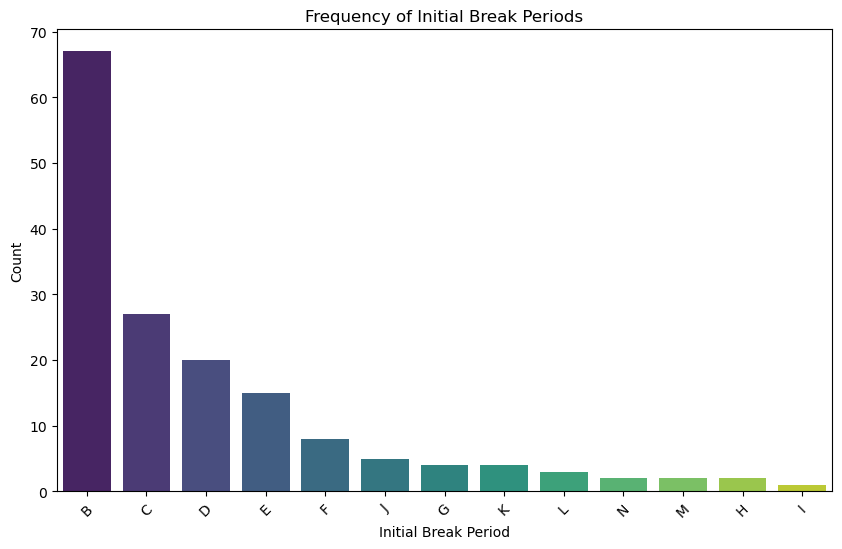

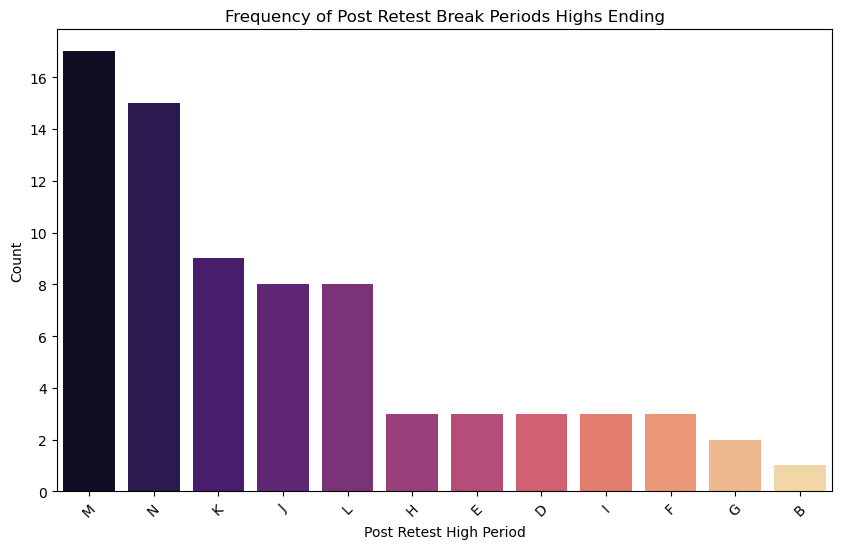

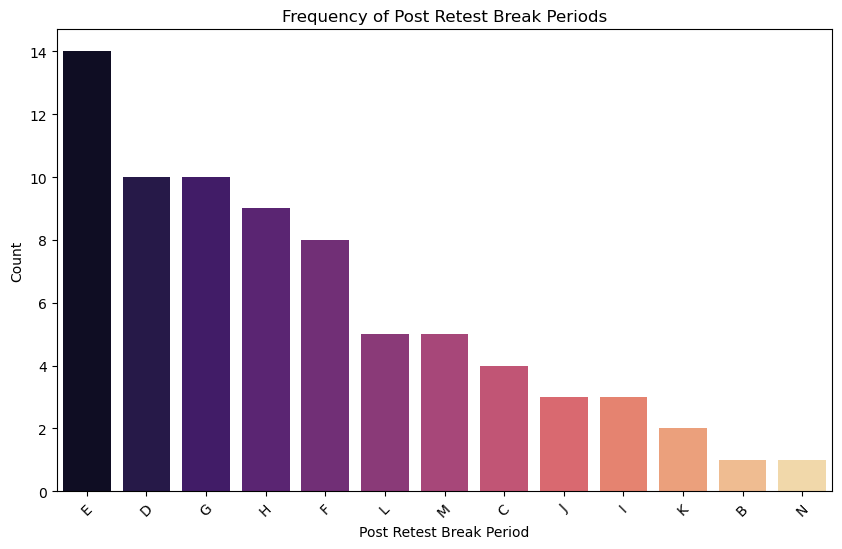

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x=ahb_df['Initial_Break_Period'].dropna(), order=ahb_df['Initial_Break_Period'].value_counts().index, palette="viridis")
plt.title('Frequency of Initial Break Periods')
plt.xlabel('Initial Break Period')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot for Post_Retest_Break_Period
plt.figure(figsize=(10, 6))
sns.countplot(x=ahb_df['Post_Retest_Break_Period'].dropna(), order=ahb_df['Post_Retest_Break_Period'].value_counts().index, palette="magma")
plt.title('Frequency of Post Retest Break Periods Highs Ending')
plt.xlabel('Post Retest High Period')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot for Post_Retest_Break_Period
plt.figure(figsize=(10, 6))
sns.countplot(x=ahb_df['Post_Retest_Break_Time'].dropna(), order=ahb_df['Post_Retest_Break_Time'].value_counts().index, palette="magma")
plt.title('Frequency of Post Retest Break Periods')
plt.xlabel('Post Retest Break Period')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

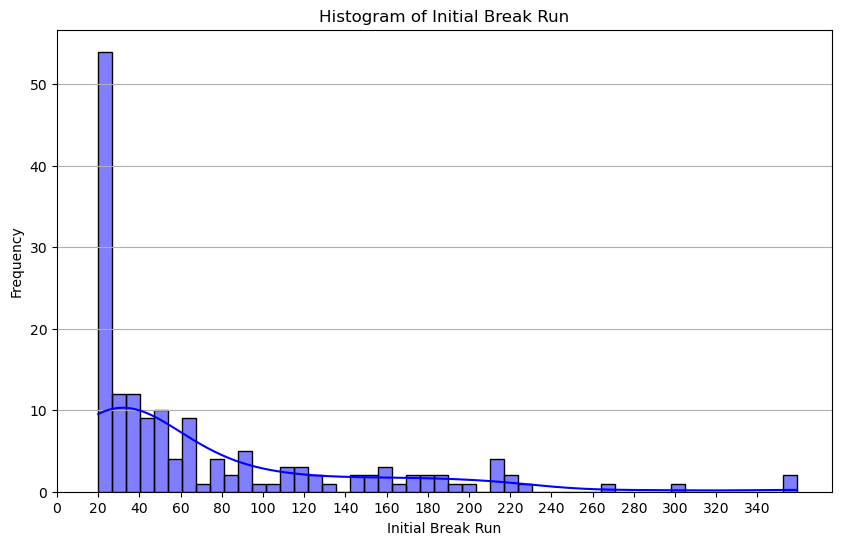

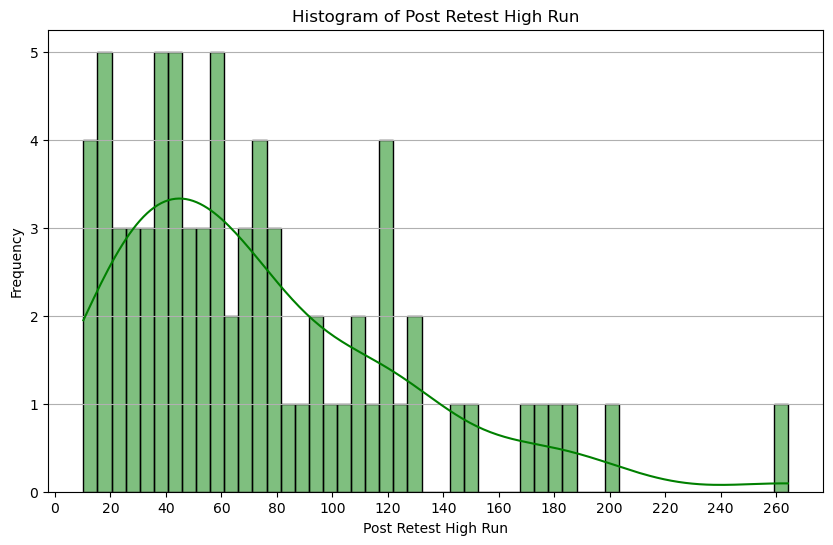

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(ahb_df[ahb_df['Initial_Break_Run'] != 0]['Initial_Break_Run'], 
             kde=True, color="blue", bins=50)
plt.title('Histogram of Initial Break Run')
plt.xlabel('Initial Break Run')
plt.ylabel('Frequency')

# Set custom x-axis ticks for more detail
plt.xticks(np.arange(0, ahb_df['Initial_Break_Run'].max(), step=20))  # Adjust step size as needed
plt.grid(axis='y')  # Optional: Add grid lines for better readability
plt.show()

# Histogram for Post Retest High Run
plt.figure(figsize=(10, 6))
sns.histplot(ahb_df[ahb_df['Post_Retest_High_Run'] != 0]['Post_Retest_High_Run'], 
             kde=True, color="green", bins=50)
plt.title('Histogram of Post Retest High Run')
plt.xlabel('Post Retest High Run')
plt.ylabel('Frequency')

# Set custom x-axis ticks for more detail
plt.xticks(np.arange(0, ahb_df['Post_Retest_High_Run'].max(), step=20))  # Adjust step size as needed
plt.grid(axis='y')  # Optional: Add grid lines for better readability
plt.show()

In [17]:
ahb_df[ahb_df['Initial_Break_Run'] != 0]['Initial_Break_Run'].value_counts()

20.00     47
213.75     2
111.00     2
94.00      2
76.75      2
          ..
153.00     1
61.25      1
64.75      1
49.50      1
59.25      1
Name: Initial_Break_Run, Length: 108, dtype: int64